In [10]:
import pytest
import pytorch_lightning as pl

from matsciml.datasets.transforms import (
    PeriodicPropertiesTransform,
    PointCloudToGraphTransform,
    PointCloudToGraphTransform,
    MGLDataTransform,
)
from matsciml.lightning import MatSciMLDataModule
from matsciml.common.registry import registry
from matsciml.models import TensorNet
from matsciml.datasets.utils import element_types
from matsciml.models.base import ForceRegressionTask, GradFreeForceRegressionTask

import torch

In [11]:
from matsciml.models.utils.io import * 
checkpoint_path = "/home/m3rg2000/Simulation/checkpoints-2024/epoch=4-step=4695_tensornet_force_r.ckpt"#"/home/m3rg2000/Simulation/checkpoints-2024/epoch=2-step=5625_tensornet.ckpt"
task = multitask_from_checkpoint(checkpoint_path)

In [12]:
# Load Data
dm = MatSciMLDataModule(
    "MaterialsProjectDataset",
    train_path="/home/m3rg2000/matsciml/Scale_new_lmdb/10k_new",#TRAIN_PATH,
    # val_split=VAL_PATH,
    # test_split=VAL_PATH,
    dset_kwargs={
        "transforms": [
            PeriodicPropertiesTransform(cutoff_radius=6.0, adaptive_cutoff=True),
            PointCloudToGraphTransform(
                "dgl",
                node_keys=["pos", "atomic_numbers"],
            ),
        ],
    },
    batch_size=1,
)

dm.setup()
train_loader = dm.train_dataloader()
dataset_iter = iter(train_loader)
batch = next(dataset_iter)


In [13]:
counter=0
Predictions_e=[]
Actuals_e=[]
for batch in train_loader:
    Result=task.forward(batch)

    Pred_Energy=Result['regression0']['corrected_total_energy'].item()
    Pred_Forces=Result['force_regression0']['force']

    Actual_Energy=batch['targets']['corrected_total_energy'].item()
    Actual_Forces=batch['targets']['force']

    Predictions_e+=[Pred_Energy]
    Actuals_e+=[Actual_Energy]
    counter+=1
    if(counter>10):
        break



In [14]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Predicted')

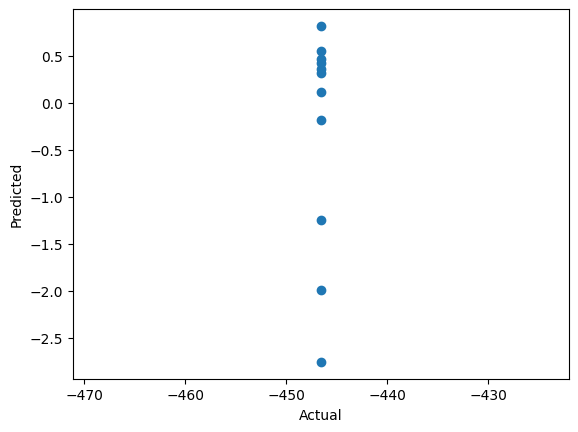

In [15]:
plt.scatter(Actuals_e,Predictions_e)
plt.xlabel("Actual")
plt.ylabel("Predicted")